# Mask R-CNN Using pretrained model

<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/github/TannerGilbert/MaskRCNN-Object-Detection-and-Segmentation/blob/master/MaskRCNN%20Using%20pretrained%20model.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/TannerGilbert/MaskRCNN-Object-Detection-and-Segmentation/blob/master/MaskRCNN%20Using%20pretrained%20model.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td></table>

## Install Matterport Mask-RCNN in Google Colab

In [ ]:
# https://stackoverflow.com/questions/53740577/does-any-one-got-attributeerror-str-object-has-no-attribute-decode-whi
!pip3 install 'h5py==2.10.0' --force-reinstall

     |████████████████████████████████| 2.9 MB 5.1 MB/s 
     |████████████████████████████████| 15.7 MB 194 kB/s 
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
google-colab 1.0.0 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
!git clone https://github.com/matterport/Mask_RCNN
%cd Mask_RCNN

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 125.23 MiB | 28.00 MiB/s, done.
Resolving deltas: 100% (565/565), done.
Checking out files: 100% (76/76), done.
/content/Mask_RCNN


In [ ]:
# https://github.com/matterport/Mask_RCNN/issues/1754#issuecomment-776493501

with open('mrcnn/model.py') as f:
    model_file = f.read()

with open('mrcnn/model.py', 'w') as f:
    model_file = model_file.replace("self.keras_model = self.build(mode=mode, config=config)",
                                    "self.keras_model = self.build(mode=mode, config=config)\n        self.keras_model.metrics_tensors = []")
    f.write(model_file)

In [ ]:
!pip3 install -r requirements.txt
!python3 setup.py install

     |████████████████████████████████| 154 kB 5.1 MB/s 
     |████████████████████████████████| 297 kB 48.0 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=21d15c3ea6d3f22169c9a3e10670ac3c4a6faa30a2f7223a7756dcb39fd3dc48
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.15.2 which is incompatible.
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'des

In [ ]:
!git clone https://github.com/cocodataset/cocoapi.git
%cd cocoapi/PythonAPI
!make
%cd ../../

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 7.34 MiB/s, done.
Resolving deltas: 100% (576/576), done.
/content/Mask_RCNN/cocoapi/PythonAPI
python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/Mask_RCNN/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-pX47U3/python3.7-3.7

## Imports

In [ ]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append("samples/coco/")  # To find local version
import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = "images"

Using TensorFlow backend.


... done downloading pretrained model!


## Configurations

We'll be using a model trained on the MS-COCO dataset. The configurations of this model are in the ```CocoConfig``` class in ```coco.py```.

For inferencing, modify the configurations a bit to fit the task. To do so, sub-class the ```CocoConfig``` class and override the attributes you need to change.

In [ ]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [ ]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

## Create Model and Load Trained Weights

In [ ]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


## Run Object Detection

Processing 1 images
image                    shape: (424, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32

[{'rois': array([[194, 281, 217, 313],
       [173, 414, 194, 439],
       [253, 620, 303, 640],
       [170, 447, 190, 468],
       [291, 237, 359, 299],
       [173, 301, 190, 321],
       [162, 465, 177, 484],
       [227, 473, 290, 552],
       [183, 461, 207, 492],
       [195, 333, 236, 391],
       [165, 567, 199, 620],
       [170, 322, 210, 365],
       [218, 535, 272, 611],
       [166, 325, 180, 356],
       [198, 481, 228, 530],
       [154, 327, 167, 339],
       [156, 316, 172, 332],
       [268, 537, 375, 640],
       [217, 344, 289, 423],
       [156, 345, 173, 362],
       

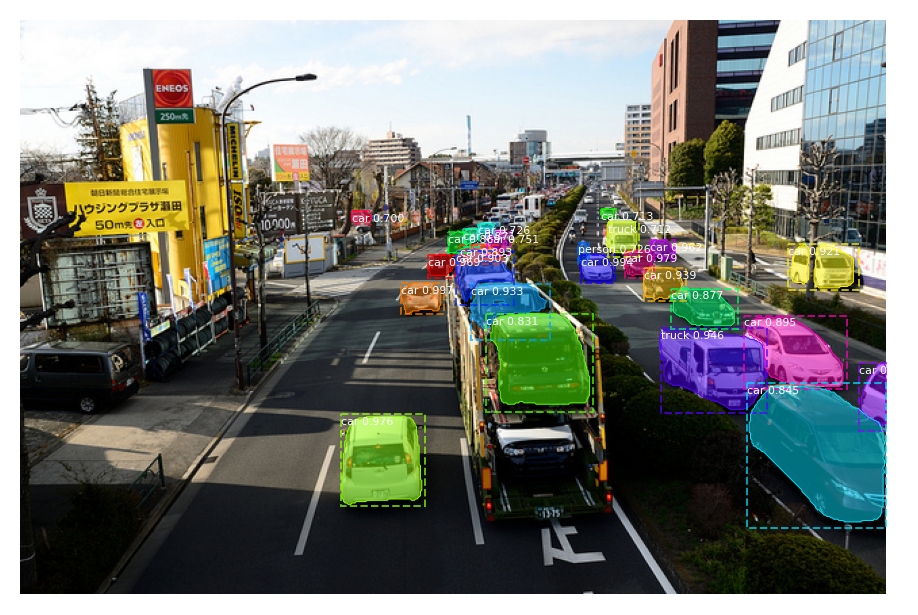

In [ ]:
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

# Run detection
results = model.detect([image], verbose=1)
print(results)
# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

Saving cars_short.mp4 to cars_short.mp4


KeyboardInterrupt: ignored

In [19]:


os.chdir('../')

import cv2

# number of images to be processed at once
batch_size = 3

class InferenceConfig(coco.CocoConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = batch_size

config = InferenceConfig()
config.display()

model = modellib.MaskRCNN(
    mode="inference", model_dir=MODEL_DIR, config=config
)
model.load_weights(COCO_MODEL_PATH, by_name=True)
CLASS_NAMES_MASKRCNN = ['background', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
                 'bus', 'train', 'truck', 'boat', 'traffic light',
                 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
                 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
                 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
                 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
                 'kite', 'baseball bat', 'baseball glove', 'skateboard',
                 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
                 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
                 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
                 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
                 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
                 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
                 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
                 'teddy bear', 'hair drier', 'toothbrush']


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     3
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 3
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [21]:
def label_to_color_image(labels):
  # Adds color defined by the dataset colormap to the label.
  h,w = labels.shape
  img = np.zeros([h,w,3])
  img = np.zeros((h,w),dtype=(float,3))
  for i in range(h):
    for j in range(w):
      img[i][j] = np.array(COLOR_MAP[CLASS_NAMES_MASKRCNN[labels[i][j]]])        
  img = img*255
  return img.astype(np.uint8)

def combine_masks(img, result):
  boxes = result['rois']
  masks = result['masks']
  class_ids = result['class_ids']
  
  N = boxes.shape[0]
  h,w,c = img.shape
  seg_map = np.zeros((h,w))
  for i in range(N):
    mask = masks[:, :, i]
    mask = mask.astype(np.uint8)
    seg_map = seg_map + mask*class_ids[i]
  
  return seg_map.astype(np.uint8)

def merge_images(foreground, background, alpha=0.3):
  out_img = np.zeros(background.shape,dtype=background.dtype)
  out_img[:,:,:] = (alpha * background[:,:,:]) + ((1-alpha) * foreground[:,:,:])
  return out_img

def get_masked_image(image, result):
  """
  Applies masks from the results to the given image
  
  """
  boxes = result['rois']
  masks = result['masks']
  
  N = boxes.shape[0]
  if not N:
    print("\n*** No instances to display *** \n")

  colors = visualize.random_colors(N)
  masked_image = image.astype(np.uint32).copy()

  for i in range(N):
      color = colors[i]

      # Mask
      mask = masks[:, :, i]
      masked_image = visualize.apply_mask(masked_image, mask, color)
  return masked_image.astype(np.uint8)

def print_fps(video):
  # Find OpenCV version
  (major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')

  if int(major_ver)  < 3 :
      fps = video.get(cv2.cv.CV_CAP_PROP_FPS)
      print("Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): {0}".format(fps))
  else :
      fps = video.get(cv2.CAP_PROP_FPS)
      print("Frames per second using video.get(cv2.CAP_PROP_FPS) : {0}".format(fps))


def make_video(outvid, images=None, fps=30, size=None,
               is_color=True, format="FMP4"):
    """
    Create a video from a list of images.
 
    @param      outvid      output video
    @param      images      list of images to use in the video
    @param      fps         frame per second
    @param      size        size of each frame
    @param      is_color    color
    @param      format      see http://www.fourcc.org/codecs.php
    @return                 see http://opencv-python-tutroals.readthedocs.org/en/latest/py_tutorials/py_gui/py_video_display/py_video_display.html
 
    The function relies on http://opencv-python-tutroals.readthedocs.org/en/latest/.
    By default, the video will have the size of the first image.
    It will resize every image to this size before adding them to the video.
    """
    from cv2 import VideoWriter, VideoWriter_fourcc, imread, resize
    fourcc = VideoWriter_fourcc(*format)
    vid = None
    for image in images:
        if not os.path.exists(image):
            raise FileNotFoundError(image)
        img = imread(image)
        if vid is None:
            if size is None:
                size = img.shape[1], img.shape[0]
            vid = VideoWriter(outvid, fourcc, float(fps), size, is_color)
        if size[0] != img.shape[1] and size[1] != img.shape[0]:
            img = resize(img, size)
        vid.write(img)
    vid.release()
    return vid

In [ ]:
'''VIDEO_DIR = os.path.join(ROOT_DIR, "videos")
VIDEO_SAVE_DIR = os.path.join(VIDEO_DIR, "save")

try:
    if not os.path.exists(VIDEO_SAVE_DIR):
        os.makedirs(VIDEO_SAVE_DIR)
except OSError:
    print ('Error: Creating directory of data')

#os.chdir('./videos')

from google.colab import files
uploads = files.upload()'''

#for upload in uploads.keys():
capture = cv2.VideoCapture('/content/Mask_RCNN/cars_short (1).mp4')
  
print_fps(capture)

try:
    if not os.path.exists(VIDEO_SAVE_DIR):
        os.makedirs(VIDEO_SAVE_DIR)
except OSError:
    print ('Error: Creating directory of data')
frames = []
frame_count = 0

while True:
    ret, frame = capture.read()
    # Bail out when the video file ends
    if not ret:
        break
        
    # Save each frame of the video to a list
    frame_count += 1
    frames.append(frame)
    print('frame_count :{0}'.format(frame_count))
    if len(frames) == batch_size:
        results = model.detect(frames, verbose=0)
        print('Predicted')
        for i, item in enumerate(zip(frames, results)):
            frame = item[0]
            r = item[1]
            #seg_map = combine_masks(frame, r)
            #seg_image = label_to_color_image(seg_map)
            #frame = merge_images(seg_image, frame)
            frame = get_masked_image(frame, r)
            name = '{0}.jpg'.format(frame_count + i - batch_size)
            name = os.path.join(VIDEO_SAVE_DIR, name)
            cv2.imwrite(name, frame)
        # Clear the frames array to start the next batch
        frames = []

capture.release()

Frames per second using video.get(cv2.CAP_PROP_FPS) : 30.0
frame_count :1
frame_count :2
frame_count :3
Predicted

*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 

frame_count :4
frame_count :5
frame_count :6
Predicted

*** No instances to display *** 


*** No instances to display *** 

frame_count :7
frame_count :8
frame_count :9
Predicted

*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 

frame_count :10
frame_count :11
frame_count :12
Predicted

*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 

frame_count :13
frame_count :14
frame_count :15
